In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w,b,num_examples):
    ##生成y=wx+b+噪声
    X = torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape(-1,1)

In [3]:
true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)      

In [4]:
print("features:",features[0],"\nlabels:",labels[0])

features: tensor([-0.9374,  0.1170]) 
labels: tensor([1.9447])


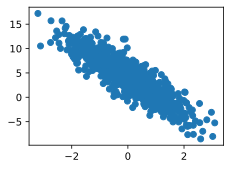

In [5]:
d2l.set_figsize();
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy())#plt.scatter 画散点图

In [6]:
def data_iter(batch_size,features,labels):
    ##生成器函数，将数据类型分块，搭配for循环语句使用
    num_examples=len(features)
    indices = list(range(num_examples))
    #这些样本是随机的
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])#
        yield features[batch_indices],labels[batch_indices]  # 这个返回值的数据类型是什么

In [7]:
batch_size = 10
X,y = next( iter(data_iter(batch_size,features,labels)))
print(X,'\n',y)

tensor([[-1.1683, -2.4006],
        [-1.0052,  0.4476],
        [ 0.4255, -1.1804],
        [ 0.3703,  1.8261],
        [-0.3826, -0.2366],
        [-1.0793, -0.4783],
        [ 0.3664, -1.3105],
        [-0.1381,  0.4700],
        [-0.6532, -0.4822],
        [-0.8908, -0.5425]]) 
 tensor([[10.0235],
        [ 0.6688],
        [ 9.0364],
        [-1.2519],
        [ 4.2175],
        [ 3.6628],
        [ 9.3832],
        [ 2.3161],
        [ 4.5263],
        [ 4.2535]])


In [7]:
w=torch.normal(0,1,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)
#初始化

In [8]:
#定义模型
def linreg(X,w,b):
    return torch.matmul(X,w)+b
#定义损失函数
def squared_loss(y_hat,y):
    return (y_hat-y)**2/2
#定义优化算法
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -=lr*param.grad/batch_size
            param.grad.zero_()

In [9]:
#定义超参数
lr = 0.03
num_epochs=3
net = linreg
loss = squared_loss
batch_size=10

In [10]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch+1},loss {float(train_l.mean())}')

epoch 1,loss 0.037352994084358215
epoch 2,loss 0.0001273291272809729
epoch 3,loss 5.3065399697516114e-05


In [11]:
print(f'w的误差估计: {true_w-w.reshape(true_w.shape)}')
print(f'b的误差: {true_b-b}')

w的误差估计: tensor([ 0.0001, -0.0006], grad_fn=<SubBackward0>)
b的误差: tensor([0.0007], grad_fn=<RsubBackward1>)
